In [1]:
import dhlab as dh
import dhlab.api.dhlab_api as api
import pandas as pd

In [2]:
tot = api.totals(200000)

In [3]:
def coll_periods(doc=None, fy=1900, ty = 2020, period = 10, word=None, before=10, after=10, ref=None, corpus_size=5000):
    colls_raw = []
    for year in range(fy, ty, period):
        print(year)
        coll = api.urn_collocation(
            urns = list(dh.Corpus(doctype=doc, fulltext = word, from_year= year, to_year = year + period, limit = corpus_size).corpus.urn),
            word=word,
            before=before, 
            after=after,         
        )
        if ref is not None:
            ref = ref/ref.sum()
            teller = coll["counts"]/coll["counts"].sum()
            coll[str(year)] = teller/ref
        #coll.columns=[str(year)]
        colls_raw.append(coll[[str(year)]])
    colls = pd.concat(colls_raw, axis=1)
    return colls

In [4]:
a = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=5, word= 'oljeutvinning', ref=tot.freq)

1970
1975
1980
1985
1990
1995
2000
2005
2010
2015


In [11]:
b = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=15, word= 'oljeutvinning', ref=tot.freq)

1970
1985
2000
2015


In [ ]:
c = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=1, word= 'oljeutvinning', ref=tot.freq)

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [5]:
a.loc[[x for x in "oljeeventyret klima klimakrisen miljø miljøvern".split() if x in a.index]].fillna(0).sort_values(by=a.columns[0], ascending=False).head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
oljeeventyret,275,30,41,0,0,66,100,263,79,86
miljøvern,6,31,0,68,170,67,28,30,18,15
klima,3,2,3,0,0,1,1,7,24,28
miljø,0,1,2,3,14,15,7,8,9,7
klimakrisen,0,0,0,0,0,0,0,49,40,65


In [12]:
b.loc[[x for x in "oljeeventyret klima klimakrisen miljø miljøvern".split() if x in a.index]].fillna(0).sort_values(by=a.columns[0], ascending=False).head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1985,2000,2015
oljeeventyret,31,32,117,102
miljøvern,21,83,17,15
klima,5,1,18,43
miljø,1,10,10,7
klimakrisen,0,0,44,204


In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<AxesSubplot:title={'center':'oljeutvinning'}>

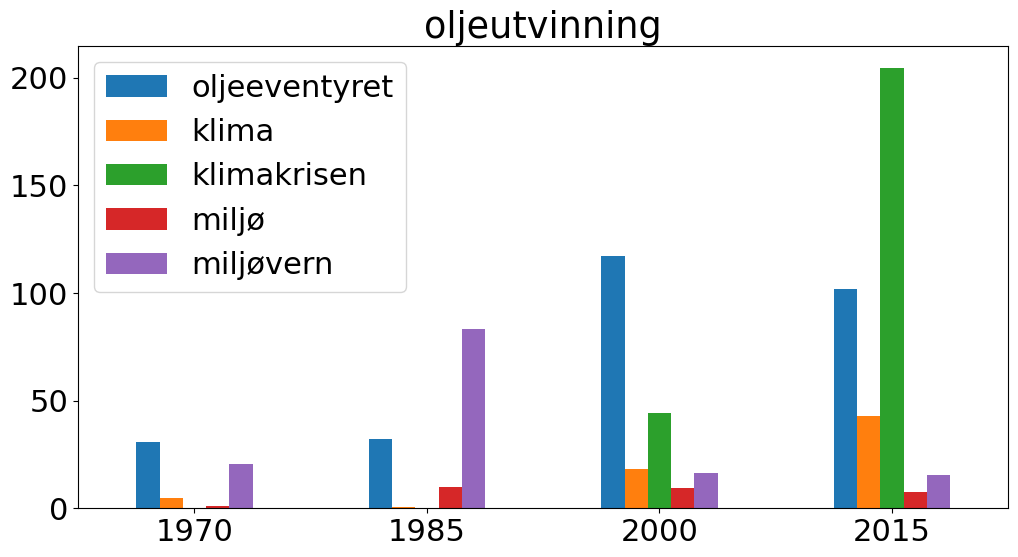

In [21]:
b.loc[[x for x in "oljeeventyret klima klimakrisen miljø miljøvern".split() if x in a.index]].transpose().plot(kind="bar",figsize=(12,6),title="oljeutvinning", rot=0)

<AxesSubplot:title={'center':'oljeutvinning'}>

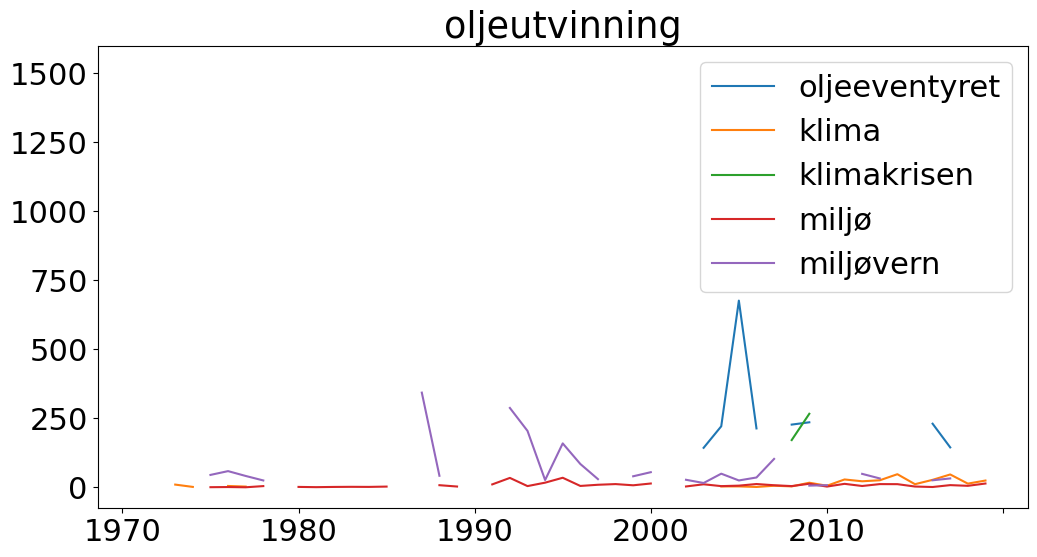

In [25]:
c.loc[[x for x in "oljeeventyret klima klimakrisen miljø miljøvern".split() if x in a.index]].transpose().plot(figsize=(12,6),title="oljeutvinning", rot=0)

In [21]:
a.sort_values(by=a.columns[1], ascending=False).fillna(0.head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1980,1990,2000,2010
bergverksdrift,2273,6479,4059,53,16
geofysikk,nan,3315,459,nan,nan
kraftforsyning,875,2568,2491,12,11
oljeleting,3813,1386,1128,751,253
storkonsernet,nan,1225,nan,nan,nan
oversiktskart,nan,1145,nan,nan,nan
vannkraftutbygging,489,1034,477,115,102
oljeutvinningen,1100,955,789,441,213
prøveboring,3709,947,210,610,113
Haltenbanken,204,811,401,nan,9


In [ ]:
a.

In [57]:
c = dh.Corpus(doctype="digibok", from_year= 1980, to_year = 1990, limit = 5000)
coll = coll = api.urn_collocation(
            urns = list(c.corpus.urn),
            word="helse",
            before=0, 
            after=10,         
        )